In [70]:
from rtree import index
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy.optimize import leastsq
import matplotlib
import sys

# 非函数式构建

## 参数

In [80]:
L=10**10
times=10**8
radius  = 100
delta = radius
maxnode = 100000
C = 0.001
sequence = []
Latticelist = {}

In [5]:
##for repeat in range(10):  #重复创建相同参数的城市
namep = 'N'+str(maxnode)+'PttRtdenpro'+'C'+str(C)+'re'+str(repeat)+'.csv'

## 初始化

In [81]:
def initiate(L,radius,C): 
    coordinate = np.ones(2)*L/2.0
    Latticelist = {(coordinate[0],coordinate[1]):{1:1, 2:1}}#1 格子有第一个点的个数 2 格子人数
    index2coor = {1:(coordinate[0],coordinate[1])}  
    idx = index.Index()
    for key in Latticelist:
        idx.insert(  Latticelist[key][1],list(np.r_[coordinate,coordinate])  )                     
    limitt = np.r_[coordinate - radius,coordinate + radius]
    ksequence = []
    ksequence.append(1)
    return (Latticelist,idx,limitt,index2coor,ksequence)

In [82]:
sequence = [];Latticelist = {}
Latticelist,idx,limitt,index2coor,sequence = initiate(L,radius,C)

In [83]:
Latticelist,idx,limitt,index2coor,sequence,C

({(5000000000.0, 5000000000.0): {1: 1, 2: 1}},
 array([  4.99999990e+09,   4.99999990e+09,   5.00000010e+09,
          5.00000010e+09]),
 {1: (5000000000.0, 5000000000.0)},
 [1],
 0.001)

## 点数参数

In [84]:
totpop = 2
tstep = 1
#time = 1
tempP = 1
tempT = 1
T = 2

## 第二步

In [85]:
def choosenode(Latticelist,limitt,C,ksequence): 
    white = ( (limitt[2]-limitt[0])*(limitt[3]-limitt[1])-len(Latticelist) )*C#空白格子
    rnd = random.random()*( sum(ksequence)+ (limitt[2]-limitt[0])*(limitt[3]-limitt[1])*C  ) #
#======================================================
#=========================================================
#真难懂！！！！！！！！！！！！！！！！！什么鬼？？？？

    if rnd> sum(ksequence)+len(Latticelist)*C:#落到空白格子
        ii = int( random.random()*(limitt[2]-limitt[0])   + limitt[0] )
        jj = int( random.random()*(limitt[3]-limitt[1])   + limitt[1] )
        if (ii,jj) not in Latticelist:
            return (ii,jj),0,ksequence
    else: 
        A = np.array(ksequence)+C
        B = np.cumsum(A)
        ind = np.nonzero(B<rnd) #ind前一个是数组，后一个是纬度！！
#怎么会有这么奇怪的函数？？？？
        if len(ind[0])==0: 
            pos = 1
        else:
            pos = ind[0][-1]+1#一定是他错了
# 这个切片代表的是前一个数组的最后一个！！！！ 
        return index2coor[pos],1,ksequence  
#第三遍3-20？？？
#第四遍3-22？？？
#第五遍4-1？？？
#好吧懂了4-3

#  肯定是 他 写错了！！！！

In [86]:
ke = [1,1,1]
rnd = 2.5
A = np.array(ke)
B = np.cumsum(A)
ind = np.nonzero(B<rnd)
ind

(array([0, 1], dtype=int32),)

1

In [89]:
def onestep(Latticelist,index2coor,idx,L,radius,C,limitt,totpop,ksequence):#9进
    ss = 1
    for i in range(2):
        ss = ss*(limitt[i+2]-limitt[i])
    ss *= C
    ss += totpop
    locallambda = ss/(L**2*C + totpop)
    #time += random.expovariate(locallambda) 

    two,flag,ksequence = choosenode(Latticelist,limitt,C,ksequence)  
    i = two[0]; j = two[1]

    intersection = list(  idx.intersection( [i-radius,j-radius, i+radius,j+radius] )  ) 
    withincircle = 0    
    if len(intersection) > 0: 

        for key in intersection:  
            if np.linalg.norm(np.array(index2coor[key]) - np.array([i,j])) <= radius: 
                withincircle += 1
                continue
                
        if flag==1:
            Latticelist[(i,j)][2] += 1
            Latticelist[(i,j)][1] += 1
            ksequence[ Latticelist[(i,j)][1]-1 ] += 1
            totpop += 1   
            
        elif  withincircle > 0  and  flag==0: 
            totpop += 1         
            Latticelist[(i,j)] = {1:len(Latticelist)+1,2:1}

            index2coor[len(Latticelist)] = (i,j)

            newpoint = [i,j]
            idx.insert( len(Latticelist), np.r_[newpoint, newpoint] )  
            ksequence.append( Latticelist[(i,j)][1] )            
            for i in range(2):  #2 is the dimension 'd'
                limitt[i]   = round(min(limitt[i],newpoint[i]-radius))
                limitt[i+2] = round(max(limitt[i+2],newpoint[i]+radius))
    return Latticelist,index2coor,idx,limitt,totpop,ksequence

In [110]:
Latticelist,index2coor,idx,limitt,totpop,sequence = onestep(Latticelist,index2coor,idx,L,radius,C,limitt,totpop,sequence)

In [111]:
Latticelist,index2coor,idx,limitt,totpop,sequence

({(4999999931, 4999999955): {1: 7, 2: 1},
  (5000000000.0, 5000000000.0): {1: 1, 2: 1},
  (5000000006, 5000000020): {1: 3, 2: 2},
  (5000000045, 4999999889): {1: 5, 2: 1},
  (5000000065, 5000000031): {1: 3, 2: 1},
  (5000000100, 4999999956): {1: 6, 2: 1},
  (5000000104, 4999999969): {1: 4, 2: 1},
  (5000000122, 4999999946): {1: 8, 2: 1}},
 {1: (5000000000.0, 5000000000.0),
  2: (5000000006, 5000000020),
  3: (5000000065, 5000000031),
  4: (5000000104, 4999999969),
  5: (5000000045, 4999999889),
  6: (5000000100, 4999999956),
  7: (4999999931, 4999999955),
  8: (5000000122, 4999999946)},
 array([  4.99999983e+09,   4.99999979e+09,   5.00000022e+09,
          5.00000013e+09]),
 9,
 [1, 3, 5, 5, 6, 7, 8])

In [113]:
for C in np.logspace(-5,3,100):
    print(C)

1e-05
1.20450354026e-05
1.4508287785e-05
1.74752840001e-05
2.10490414451e-05
2.53536449397e-05
3.05385550883e-05
3.67837977183e-05
4.43062145758e-05
5.33669923121e-05
6.42807311728e-05
7.74263682681e-05
9.32603346883e-05
0.000112332403298
0.000135304777458
0.000162975083462
0.000196304065004
0.000236448941265
0.000284803586844
0.000343046928631
0.000413201240012
0.000497702356433
0.000599484250319
0.000722080901839
0.000869749002618
0.00104761575279
0.00126185688307
0.00151991108295
0.0018307382803
0.0022051307399
0.00265608778295
0.0031992671378
0.00385352859371
0.00464158883361
0.00559081018251
0.00673415065775
0.0081113083079
0.00977009957299
0.0117681195243
0.0141747416293
0.0170735264747
0.0205651230835
0.0247707635599
0.0298364724028
0.035938136638
0.0432876128108
0.05214008288
0.0628029144183
0.0756463327555
0.0911162756115
0.109749876549
0.132194114847
0.159228279334
0.191791026167
0.231012970008
0.278255940221
0.335160265094
0.40370172586
0.486260158007
0.585702081806
0.705480

# sandpile

In [71]:
import random
import glob
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import imageio

## 初始化

In [72]:
def sandpile(size="3x3",sand_max=4, initial_min=0, initial_max=3):
    try:
        r, c = map(int, size.strip().split('x'))
        pile["r"] = r
        pile["c"] = c
    except Exception:
        print("Enter in the form <int>x<int> (eg, 4x4)")
        raise
    for row in range(1, r+1):
        for col in range(1, c+1):
            pile[(row, col)]["max"] = sand_max
            pile[(row, col)]["#"] = random.randint(initial_min, initial_max)
    return pile

In [73]:
pile = defaultdict(dict)

In [48]:
sandpile("3x3",0,4)

ValueError: empty range for randrange() (4,4, 0)

In [74]:
def pad_pile(pile):
    r = pile["r"]
    c = pile["c"]

    for col in range(c+2):
        pile[(0, col)]["max"] = 0
        pile[(0, col)]["#"] = 0
        pile[(r+1, col)]["max"] = 0
        pile[(r+1, col)]["#"] = 0

    for row in range(1, r+1):
        pile[(row, 0)]["max"] = 0
        pile[(row, 0)]["#"] = 0
        pile[(row, c+1)]["max"] = 0
        pile[(row, c+1)]["#"] = 0

    return pile

In [75]:
def unpad_pile(pile):
    r = pile["r"]
    c = pile["c"]

    for col in range(c+2):
        del pile[(0, col)]
        del pile[(r+1, col)]

    for row in range(1, r+1):
        del pile[(row, 0)]
        del pile[(row, c+1)]
    return pile

## 作图函数

In [76]:
def plot(pile, labels):
    numpy_array = convert_to_numpy_array(pile)
    plt.matshow(numpy_array, cmap=plt.get_cmap('gist_rainbow'))
    plt.axis('off')
    if labels:
        it = np.nditer(numpy_array, flags=['multi_index'])
        while not it.finished:
            plt.text(it.multi_index[1], it.multi_index[0], int(it[0]), va='center', ha='center')
            it.iternext()
    return plt

def convert_to_numpy_array(pile):
    r = pile["r"]
    c = pile["c"]
    np_array = np.empty(shape=(r, c))
    for row in range(r):
        for col in range(c):
            np_array[row][col] = pile[(row+1, col+1)]["#"]
    return np_array

In [54]:
plt = plot(pile, True)

TypeError: 'dict' object cannot be interpreted as an integer

## 主函数

In [77]:
def pile_unstable(pile):
    r = pile["r"]
    c = pile["c"]
    for row in range(1, r+1):
        for col in range(1, c+1):
            if pile[(row, col)]["#"] > pile[(row, col)]["max"]:
                return True
    return False

In [78]:
def run_pile(pile, picture=False, labels=False, gif=False):
    pad_pile(pile)
    count = 0
    while pile_unstable(pile):
        count += 1
        collapse_pile(pile)
    unpad_pile(pile)
    print("Ran for %i iterations" % count)
    plt = plot(pile, labels)

In [79]:
def collapse_pile(pile):
    toppable_squares = []
    r = pile["r"]
    c = pile["c"]
    for row in range(1, r+1):
        for col in range(1, c+1):
            if pile[(row, col)]["#"] > pile[(row, col)]["max"]:
                toppable_squares.append((row, col))
    for square in toppable_squares:
        r, c = square[0], square[1]
        arounddic = {1:(r-1,c-1),2:(r-1,c),3:(r-1,c+1),
                     4:(r  ,c-1),5:(r  ,c),6:(r  ,c+1),
                     7:(r+1,c-1),8:(r+1,c),9:(r+1,c+1)}
        deltas = []
        for i in range(1,10):
            delta =pile[square]["#"] - pile[arounddic[i]]["#"]
            deltas.append(delta)
        B = np.cumsum(deltas)
        rnd = random.random()*B[-1]
        ind = np.nonzero(B<rnd)
        if len(ind[0])==0:
            pos = 1
        else:
            pos = ind[0][-1]+2
        pile[arounddic[pos]]["#"] += 1
        pile[square]["#"] -= 1
        return pile

## test

sandpile(size="3x3",sand_max=4, initial_min=0, initial_max=3)

In [91]:
pile = defaultdict(dict)

In [92]:
sandpile("3x3",3)

defaultdict(dict,
            {(1, 1): {'#': 1, 'max': 3},
             (1, 2): {'#': 1, 'max': 3},
             (1, 3): {'#': 2, 'max': 3},
             (2, 1): {'#': 2, 'max': 3},
             (2, 2): {'#': 1, 'max': 3},
             (2, 3): {'#': 2, 'max': 3},
             (3, 1): {'#': 3, 'max': 3},
             (3, 2): {'#': 1, 'max': 3},
             (3, 3): {'#': 2, 'max': 3},
             'c': 3,
             'r': 3})

In [93]:
pile[(2,2)]["#"] = 4

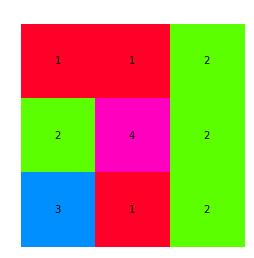

In [94]:
plt = plot(pile, True)

Ran for 1 iterations


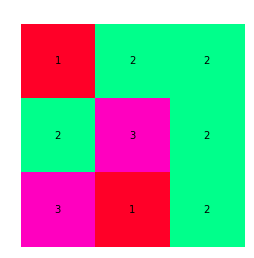

In [95]:
run_pile(pile,labels=True)

# 重构

In [1]:
from rtree import index
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy.optimize import leastsq
import matplotlib
import sys

In [2]:
L=10**10
times=10**3
r0  = 100
delta = r0
maxnode = 1000
C = 1
sequence = []; 
nodelist = {}

In [3]:
def initiate(L,radius,C): 
    coordinate = np.ones(2)*L/2.0
    Latticelist = {(coordinate[0],coordinate[1]):{1:1, 2:1}}#1 格子有第一个点的个数 2 格子人数
    index2coor = {1:(coordinate[0],coordinate[1])}  
    idx = index.Index()
    for key in Latticelist:
        idx.insert(  Latticelist[key][1],list(np.r_[coordinate,coordinate])  )                     
    limitt = np.r_[coordinate - radius,coordinate + radius]
    ksequence = []
    ksequence.append(1)
    return (Latticelist,idx,limitt,index2coor,ksequence)

In [4]:
def choosenode(Latticelist,limitt,C,ksequence): 
    white = ( (limitt[2]-limitt[0])*(limitt[3]-limitt[1])-len(Latticelist) )*C#空白格子
    rnd = random.random()*( sum(ksequence)+ (limitt[2]-limitt[0])*(limitt[3]-limitt[1])*C  ) 

    if rnd> sum(ksequence)+len(Latticelist)*C:#落到空白格子
        ii = int( random.random()*(limitt[2]-limitt[0])   + limitt[0] )
        jj = int( random.random()*(limitt[3]-limitt[1])   + limitt[1] )
        if (ii,jj) not in Latticelist:
            return (ii,jj),0,ksequence
    else: 
        A = np.array(ksequence)+C
        B = np.cumsum(A)
        ind = np.nonzero(B<rnd)
        if len(ind[0])==0: 
            pos = 1
        else:
            pos = ind[0][-1]+1
        return index2coor[pos],1,ksequence  

In [5]:
def onestep(Latticelist,index2coor,idx,L,radius,C,limitt,totpop,ksequence):#9进
    ss = 1
    for i in range(2):
        ss = ss*(limitt[i+2]-limitt[i])
    ss *= C
    ss += totpop
    locallambda = ss/(L**2*C + totpop)
    two,flag,ksequence = choosenode(Latticelist,limitt,C,ksequence)  
    i = two[0]; j = two[1]
    intersection = list(  idx.intersection( [i-radius,j-radius, i+radius,j+radius] )  ) 
    withincircle = 0    
    if len(intersection) > 0: 
        for key in intersection:  
            if np.linalg.norm(np.array(index2coor[key]) - np.array([i,j])) <= radius: 
                withincircle += 1
                continue                
        if flag==1:
            Latticelist[(i,j)][2] += 1
            Latticelist[(i,j)][1] += 1
            ksequence[ Latticelist[(i,j)][1]-1 ] += 1
            totpop += 1              
        elif  withincircle > 0  and  flag==0: 
            totpop += 1         
            Latticelist[(i,j)] = {1:len(Latticelist)+1,2:1}

            index2coor[len(Latticelist)] = (i,j)

            newpoint = [i,j]
            idx.insert( len(Latticelist), np.r_[newpoint, newpoint] )  
            ksequence.append( Latticelist[(i,j)][1] )            
            for i in range(2):  #2 is the dimension 'd'
                limitt[i]   = round(min(limitt[i],newpoint[i]-radius))
                limitt[i+2] = round(max(limitt[i+2],newpoint[i]+radius))
    return Latticelist,index2coor,idx,limitt,totpop,ksequence

In [8]:
totpop = 1
tstep = 1
tempP = 1
tempT = 1
T = 2

In [6]:
nodelist,idx,limitt,index2coor,sequence = initiate(L,r0,C)

In [11]:
while totpop < maxnode:
    nodelist,index2coor,idx,limitt,totpop,sequence = onestep(nodelist,index2coor,idx,L,r0,C,limitt,totpop,sequence)

TypeError: 'NoneType' object is not iterable

# 测试

In [2]:
import pandas as pd 
import pandas 

In [4]:
df = pd.read_csv(r"I:\Project\ScaleCity\Scaling\N=100000--C0.0100--R100--v0.csv",sep = ',')

In [5]:
pd.option_context('display.float_format', lambda x: '%.3f' % x)

In [6]:
df

,5.000000000000000000e+01,5.602253996834716081e-03
0,150.0,0.005645
1,250.0,0.004883
2,350.0,0.005043
3,450.0,0.004555
4,550.0,0.004503
5,650.0,0.004574
6,750.0,0.004287
7,850.0,0.004072
8,950.0,0.004113
9,1050.0,0.004185


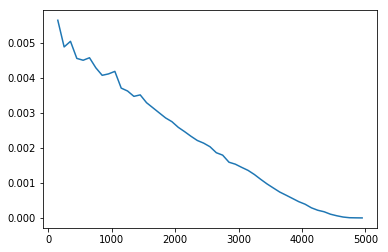

In [9]:
%matplotlib inline
x = df.iloc[:,[0]]
y = df.iloc[:,[1]]
import matplotlib.pyplot as plt
plt.plot(x,y)

In [39]:
np.logspace(1,3,10)

array([   10.        ,    16.68100537,    27.82559402,    46.41588834,
          77.42636827,   129.1549665 ,   215.443469  ,   359.38136638,
         599.48425032,  1000.        ])